In [2]:
import numpy as np


def strassen_algorithm(x, y):
    if x.size == 1 or y.size == 1:
        return x * y

    n = x.shape[0]

    if n % 2 == 1:
        x = np.pad(x, (0, 1), mode='constant')
        y = np.pad(y, (0, 1), mode='constant')

    m = int(np.ceil(n / 2))
    a = x[: m, : m]
    b = x[: m, m:]
    c = x[m:, : m]
    d = x[m:, m:]
    e = y[: m, : m]
    f = y[: m, m:]
    g = y[m:, : m]
    h = y[m:, m:]
    p1 = strassen_algorithm(a, f - h)
    p2 = strassen_algorithm(a + b, h)
    p3 = strassen_algorithm(c + d, e)
    p4 = strassen_algorithm(d, g - e)
    p5 = strassen_algorithm(a + d, e + h)
    p6 = strassen_algorithm(b - d, g + h)
    p7 = strassen_algorithm(a - c, e + f)
    result = np.zeros((2 * m, 2 * m), dtype=np.int32)
    result[: m, : m] = p5 + p4 - p2 + p6
    result[: m, m:] = p1 + p2
    result[m:, : m] = p3 + p4
    result[m:, m:] = p1 + p5 - p3 - p7

    return result[: n, : n]


In [3]:
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(3000)

3000


In [13]:
#strassen 


from multiprocessing.dummy import Array
import numpy as np
import time
import statistics as stat
import pandas as pd
from typing import NamedTuple
from collections import namedtuple
import matplotlib.pyplot as mp

results_list = []
Strassen = namedtuple('Strassen', ['matrix_size', 'time'])

for i in range(2, 10):
    X = np.random.rand(2**i, 2**i)
    Y = np.random.rand(2**i, 2**i)
    
    # start algorithms with this vector, measure time
    start_time = time.time()
    algorithm = strassen_algorithm(X, Y)
    finish_time = time.time()
    time_result = (finish_time - start_time)

    # write down the results of experiment
    result = Strassen(i, time_result)
    results_list.append(result)
    print(i)
    


2
3
4
5
6
7
8
9


In [14]:
def naive(A, B, result): 

    for i in range(len(A)):

        # iterating by column by B
        for j in range(len(B[0])):

            # iterating by rows of B
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
        return result

In [15]:
from typing import NamedTuple
from collections import namedtuple
import matplotlib.pyplot as mp

results_list_naive = []
Naive = namedtuple('Naive', ['matrix_size', 'time'])

for i in range(2, 10):
    X = np.random.rand(2**i, 2**i)
    Y = np.random.rand(2**i, 2**i)
    
    C = np.empty((2**i, 2**i))
    
    # start algorithms with this vector, measure time
    start_time = time.time()
    algorithm = naive(X, Y, C)
    finish_time = time.time()
    time_result = (finish_time - start_time)

    # write down the results of experiment
    result_naive = Naive(i, time_result)
    results_list_naive.append(result)
    print(i)


2
3
4
5
6
7
8
9


In [9]:
results_list = []
Strassen = namedtuple('Strassen', ['matrix_size', 'time'])

for i in range(2, 9):
    X = np.random.rand(2**i, 2**i)
    Y = np.random.rand(2**i, 2**i)
    
    # start algorithms with this vector, measure time
    start_time = time.time()
    algorithm = strassen_algorithm(X, Y)
    finish_time = time.time()
    time_result = (finish_time - start_time)

    # write down the results of experiment
    result = Strassen(i, time_result)
    results_list.append(result)

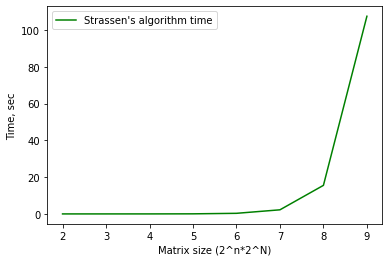

In [19]:
df = pd.DataFrame(results_list, columns=results_list[0]._fields)
x = df["matrix_size"]
y = df["time"]

df_naive = pd.DataFrame(results_list_naive, columns=results_list_naive[0]._fields)

x_naive = df["matrix_size"]
y_niave = df["time"]

mp.plot(x,y,label="Strassen's algorithm time", color="green")
# mp.plot(x_naive,y_niave,label="Naive algorithm time", color="blue")
# mp.plot(x, y_fit,label="theoretical curve")
# mp.ylim(0,1)
mp.xlabel("Matrix size (2^n*2^N)")
mp.ylabel("Time, sec")
mp.legend()
mp.show()


In [11]:
y_niave

0     0.000537
1     0.001415
2     0.006773
3     0.045225
4     0.314227
5     2.210160
6    15.482221
Name: time, dtype: float64

In [12]:
y

0     0.000537
1     0.001415
2     0.006773
3     0.045225
4     0.314227
5     2.210160
6    15.482221
Name: time, dtype: float64